# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [76]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [77]:
df = pd.read_csv("housing.csv")
df.rename(columns={
    'longitude': 'longitude',
    'latitude': 'latitude',
    'housing_median_age': 'idade_mediana_das_residências',
    'total_rooms': 'total_de_cômodos',
    'total_bedrooms': 'total_de_quartos',
    'population': 'população',
    'households': 'domicílios',
    'median_income': 'renda_mediana',
    'median_house_value': 'valor_mediano_das_residências',
    'ocean_proximity': 'proximidade_do_oceano'
}, inplace=True)
df

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana,valor_mediano_das_residências,proximidade_do_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

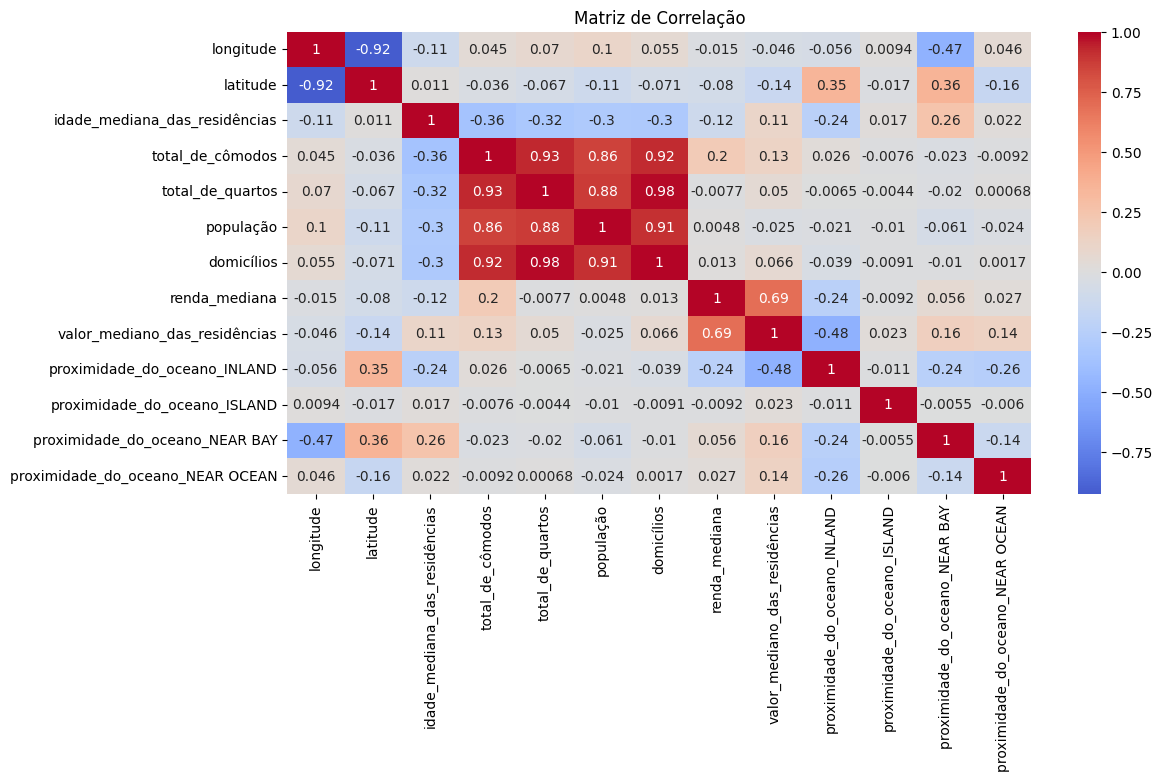

In [78]:
df = pd.get_dummies(df,drop_first=True)
# Calculando a Matriz de Correlação
correlation_matrix = df.corr()

# Criando o Heatmap da Matriz de Correlação
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [79]:
df.dropna(inplace=True)
X = df.drop(columns='valor_mediano_das_residências').copy()
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   longitude                         20433 non-null  float64
 1   latitude                          20433 non-null  float64
 2   idade_mediana_das_residências     20433 non-null  float64
 3   total_de_cômodos                  20433 non-null  float64
 4   total_de_quartos                  20433 non-null  float64
 5   população                         20433 non-null  float64
 6   domicílios                        20433 non-null  float64
 7   renda_mediana                     20433 non-null  float64
 8   proximidade_do_oceano_INLAND      20433 non-null  uint8  
 9   proximidade_do_oceano_ISLAND      20433 non-null  uint8  
 10  proximidade_do_oceano_NEAR BAY    20433 non-null  uint8  
 11  proximidade_do_oceano_NEAR OCEAN  20433 non-null  uint8  
dtypes: f

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana,proximidade_do_oceano_INLAND,proximidade_do_oceano_ISLAND,proximidade_do_oceano_NEAR BAY,proximidade_do_oceano_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [80]:
y = df.loc[:,'valor_mediano_das_residências']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: valor_mediano_das_residências, dtype: float64

In [81]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=2507)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (15324, 12)
X_test: (5109, 12)
y_train: (15324,)
y_test: (5109,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [86]:
# árvore regression model
tree_1 = DecisionTreeRegressor(max_depth = 8, random_state = 2507)
tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 2507)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2507)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [87]:
# Calcula o MSE para as duas árvores
mse1_train = mean_squared_error(y_train, tree_1.predict(X_train))
mse1_test = mean_squared_error(y_test, tree_1.predict(X_test))
mse2_train = mean_squared_error(y_train, tree_2.predict(X_train))
mse2_test = mean_squared_error(y_test, tree_2.predict(X_test))

# Imprime os resultados de forma simplificada
print(f'Árvore 1 (profundidade {tree_1.get_depth()}) tem um erro quadrático médio de - Treino: {mse1_train:.2f}, Teste: {mse1_test:.2f}')
print(f'Árvore 2 (profundidade {tree_2.get_depth()}) tem um erro quadrático médio de - Treino: {mse2_train:.2f}, Teste: {mse2_test:.2f}')

Árvore 1 (profundidade 8) tem um erro quadrático médio de - Treino: 3097474910.60, Teste: 3943929017.15
Árvore 2 (profundidade 2) tem um erro quadrático médio de - Treino: 6747664717.61, Teste: 6743893209.80


In [88]:
r2_1_train = tree_1.score(X=X_train, y=y_train)
r2_2_train = tree_2.score(X=X_train, y=y_train)

r2_1_test = tree_1.score(X=X_test, y=y_test)
r2_2_test = tree_2.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (R-quadrado) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', r2_1_train).replace(".", ","))
print(template.format(tree_1.get_depth(), 'teste', r2_1_test).replace(".", ","), '\n')

print(template.format(tree_2.get_depth(), 'treino', r2_2_train).replace(".", ","))
print(template.format(tree_2.get_depth(), 'teste', r2_2_test).replace(".", ","))

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de treino é: 0,77
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de teste é: 0,71 

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de treino é: 0,49
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de teste é: 0,50


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [89]:
print(f'A árvore que parece mais adequada é `tree_1` com profundidade = {tree_1.get_depth()}')

tree_1

A árvore que parece mais adequada é `tree_1` com profundidade = 8


DecisionTreeRegressor(max_depth=8, random_state=2507)

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

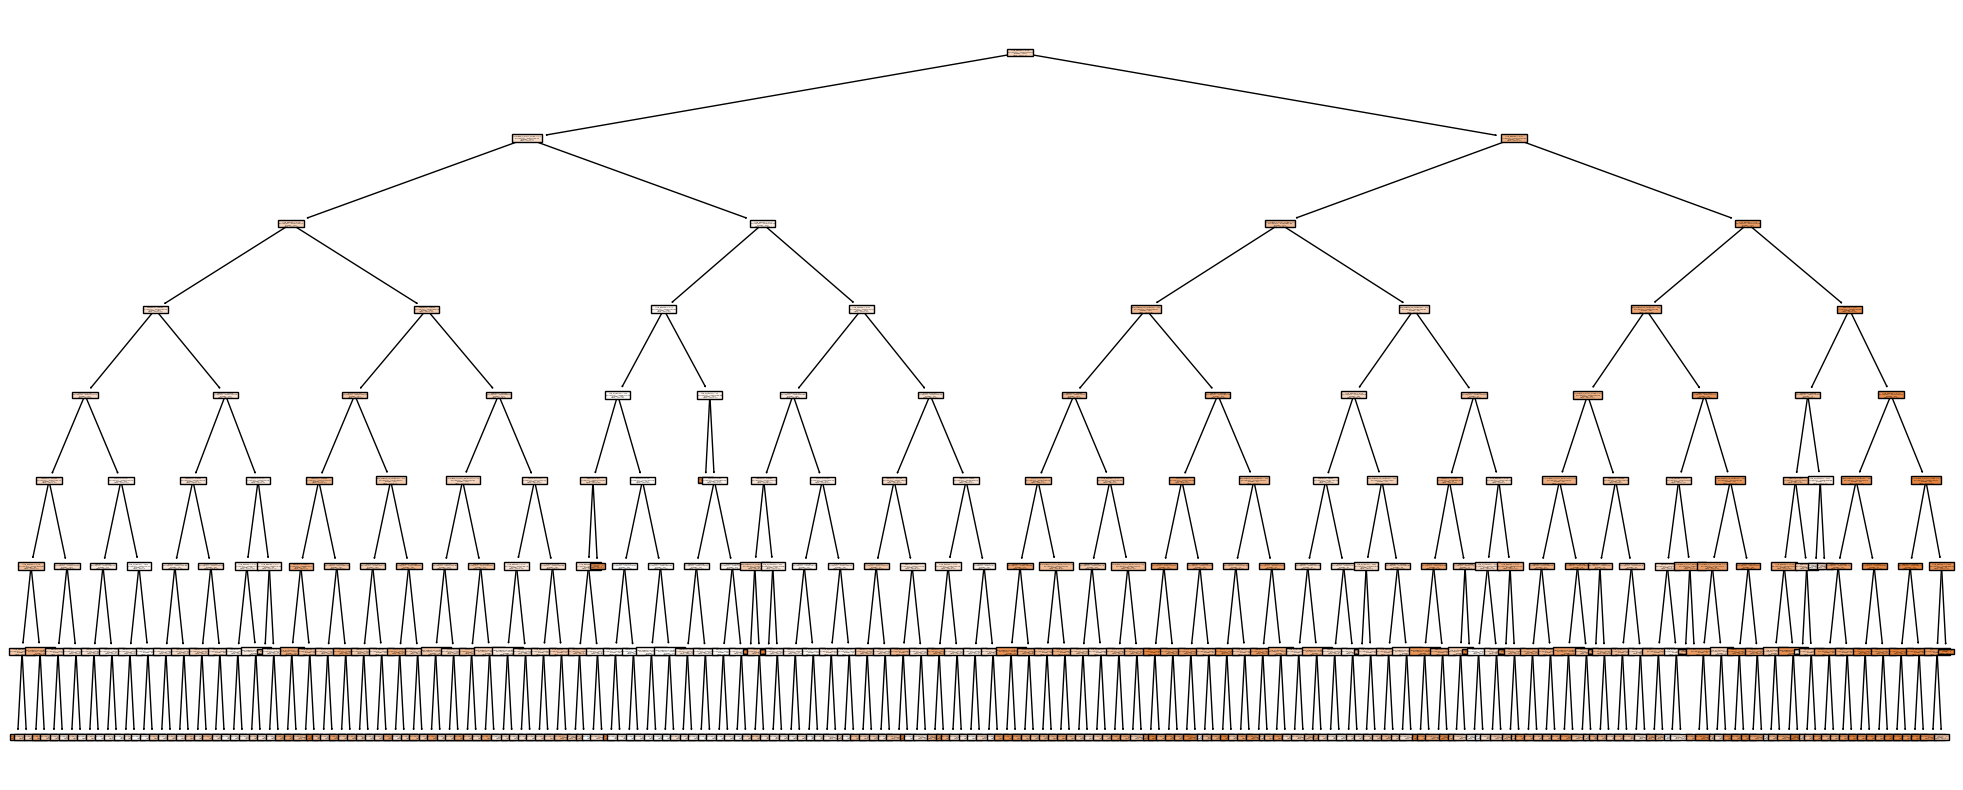

In [92]:
plt.rcParams['figure.figsize'] = [25, 10]


tp = tree.plot_tree(decision_tree=tree_1,
                    feature_names=X.columns,
                    filled=True)

É a variavel 'renda mediana' a mais importante, Visto que é a que traz maior associação com a variavel target.